# Démonstration KNN 2 paramètres en utilisant la base IRIS - Ewan Vidal

## Importation des Bibliothèques:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Fonction pour calculer la distance Euclidienne:

In [23]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Implémentation de KNN sans scikit-learn:

In [24]:
def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for test_sample in X_test:
        distances = [euclidean_distance(test_sample, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

# Chargement de la base de données Iris:

In [25]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Utilisation seulement des 2 premières caractéristiques
y = iris.target

  # Normalisation des données:

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Séparation en train/test:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Prédictions avec KNN

In [28]:
y_pred = knn_predict(X_train, y_train, X_test, k=3)

# Calcul de la matrice de confusion

In [29]:
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion

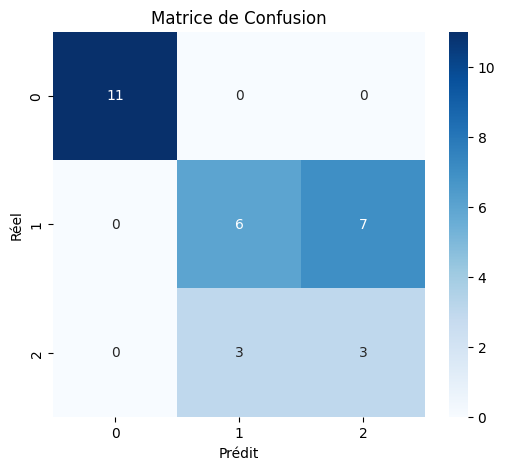

In [30]:
def afficher_matrice_confusion(cm, labels):
    """Affiche la matrice de confusion."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion')
    plt.show()

# Affichage de la matrice de confusion
afficher_matrice_confusion(cm, np.unique(y))

# Affichage de l'espace des paramètres

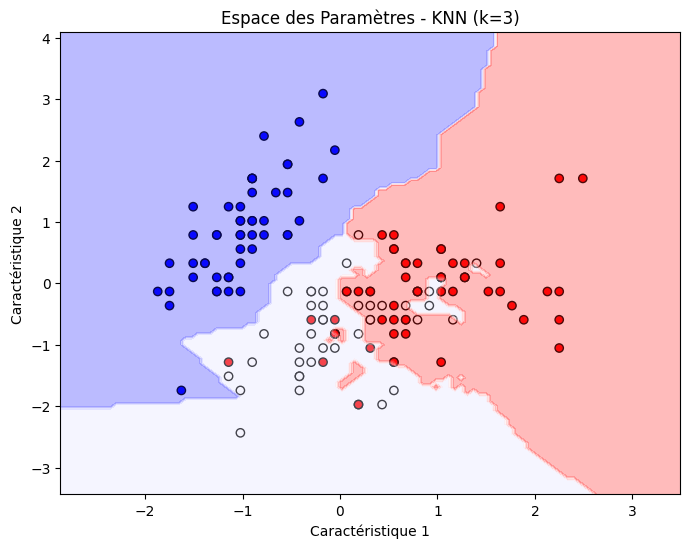

In [31]:
def afficher_espace_parametres(X, y, X_train, y_train, k=3):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # Tracé des frontières de décision
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = knn_predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    
    plt.xlabel('Caractéristique 1')
    plt.ylabel('Caractéristique 2')
    plt.title(f'Espace des Paramètres - KNN (k={k})')
    plt.show()

afficher_espace_parametres(X, y, X_train, y_train, k=3)

